In [88]:
import mdtraj
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Loads the .h5 trajectory file from the post-squeeze production run using OpenMM
target_traj = mdtraj.load("/Users/zhaoziyuan/Dropbox/Fall21/Research/Doeke_lab/PDZ_simulation/squeezed_production1.h5")
top = target_traj[0].topology


In [75]:
# 24 chains from the P 41 3 2 space group, we will calculate RMSD for each
def compute_RMSD_by_chain(target_traj, top, rule):
    chains_rmsd = []
    n_chains = 0
    n_frames = target_traj.n_frames
    for chain_id in range(top.n_chains):
        n_chains += 1
        atoms_selection = top.select("chainid " + str(chain_id) + " and " + rule)
        if(len(atoms_selection) == 0): # no valid atoms bound to a.a. residues 
            continue
        chain_rmsd = mdtraj.rmsd(target_traj, target_traj, 0, atoms_selection)
        chains_rmsd.append(chain_rmsd)

    return np.array(chains_rmsd)

In [79]:
def plot_RMSD_by_chain(chains_rmsd, rule):
    plt.figure(figsize=(18, 12))
    plt.rc('font', size=16)
    plt.title("PDZ domain RMSD by chain (rule: {})".format(rule))
    plt.xlabel("Time (ns)")
    plt.xticks(np.arange(0, n_frames,100), np.arange(0, n_frames,100) / 10)
    plt.ylabel("RMSD (Å)")
    for chid, chain_rmsd in enumerate(chains_rmsd):
        plt.plot(chain_rmsd, label = "chain " + str(chid))

    plt.legend(loc = 'upper right')



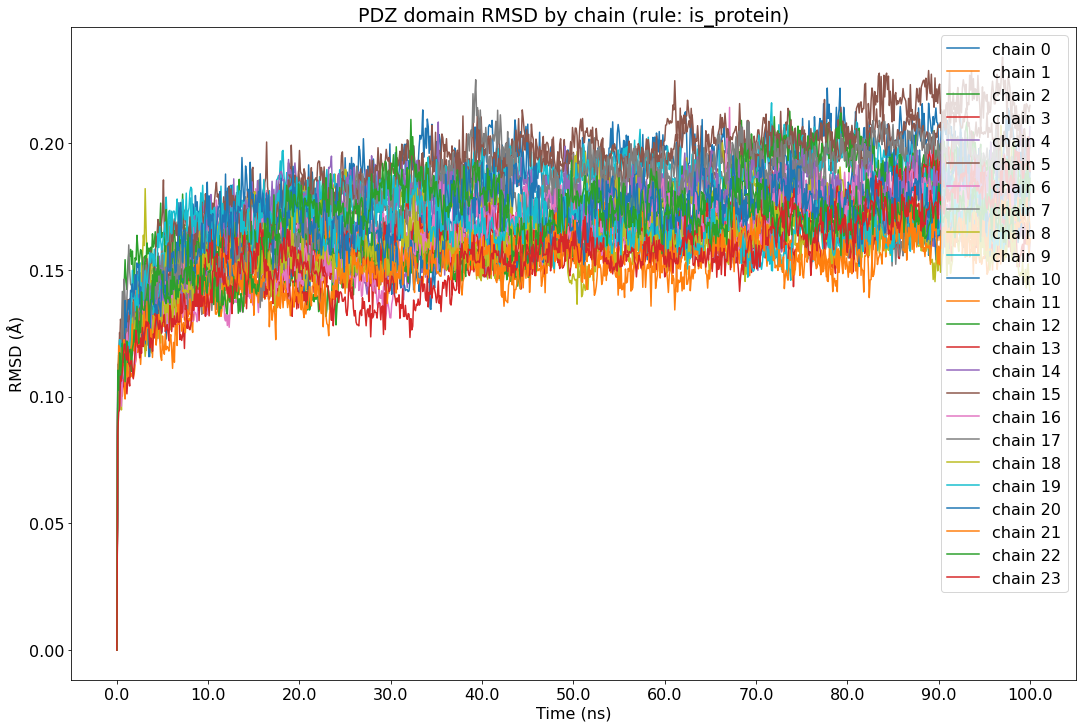

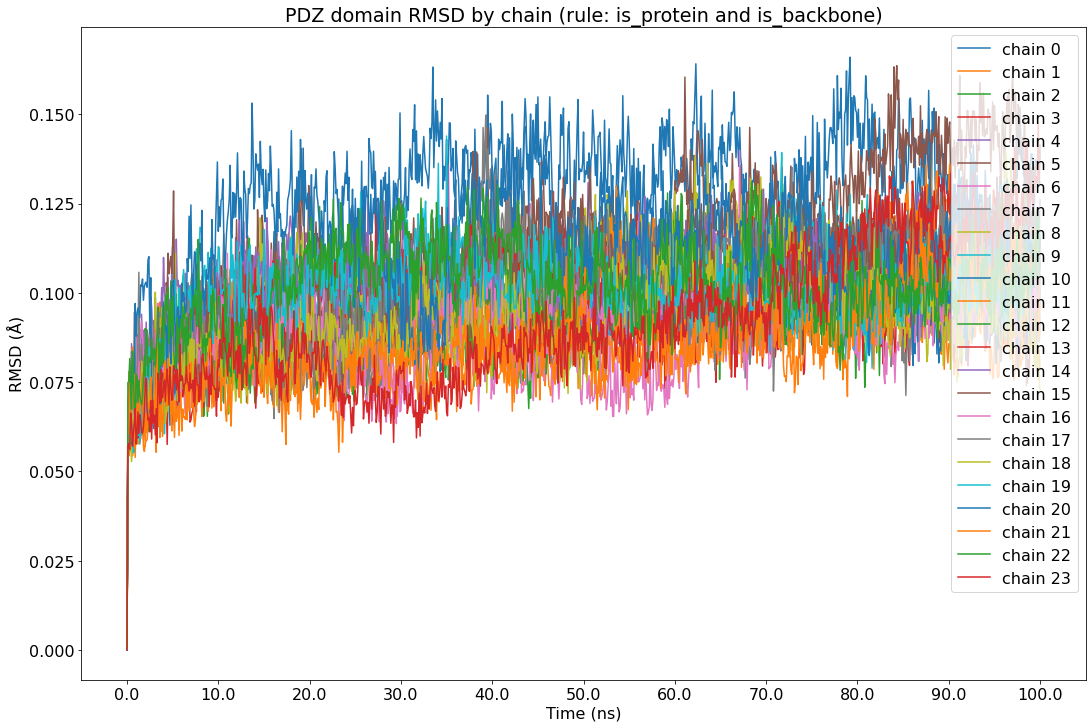

In [81]:
chains_rmsd_all_atoms = compute_RMSD_by_chain(target_traj, top, "is_protein")
plot_RMSD_by_chain(chains_rmsd_all_atoms, "is_protein")
chains_rmsd_backbone_atoms = compute_RMSD_by_chain(target_traj, top, " is_protein and is_backbone")
plot_RMSD_by_chain(chains_rmsd_backbone_atoms, "is_protein and is_backbone")
